# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals.On any given day, many professionals who are interested in the courses land on their website and browse for courses. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

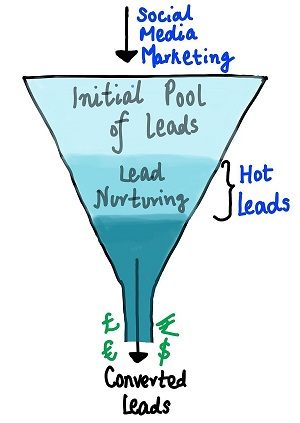



There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.



## Business Goals

The main goals for this case study are:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- To adjust to if the company's requirement changes in the future so we will need to handle these as well.

## Data required for the Case Study

The leads.csv dataset from the past have been provided with around 9000 data points.This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. Another thing that we need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. 

## Steps Involved in the Case Study

The steps involved in the Case Study are as follows:
    
1.  Importing necessary Libraries
2.  Data Sourcing (Reading and understanding the data)
3.  Data Cleaning
4.  Visualisation of the data
5.  Data Preparation for building the Model
6.  Building the Model
7.  Making Prediction on the Train dataset
8.  Evaluation of the Model
9.  Making Predictions on the Test Set
10. Determining Feature Importance
11. Final Observations
12. Recommendations



## 1. Importing necessary Libraries

In [1929]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

## 2. Data Sourcing (Reading and understanding the data)

### 2.1 Loading the Dataset

In [1930]:
# Importing lead dataset

leads_df = pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### 2.2 To find number of rows and columns

In [1931]:
# checking the shape of the data 

leads_df.shape

(9240, 37)

There are 9240 rows and 37 columns

### 2.3 Checking the information about the dataset

In [1932]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 2.3 Summary statistics of the numerical values present in the dataset

In [1933]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


From the count column mentioned above it is very clear that there are so many missing values present in the dataset.

### 2.4 To check the columns

In [1934]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### 2.5 To check the size of the data

In [1935]:
leads_df.size

341880

### 2.6 To check the dimension of the data¶

In [1936]:
leads_df.ndim

2

### 2.7 To check the data type

In [1937]:
leads_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

## 3. Data Cleaning

- Check for Duplicates
- Replace the 'Select' value in the categorical values to NaN.
- Check Percentage of Missing values for all columns
- Drop columns with a high percentage of missing values
- Drop categorical columns that are highly skewed
- Impute columns with less percentage of missing values


### To check for Duplicates

In [1938]:
leads_df.loc[leads_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate records in the dataset.

In [1939]:
print(sum(leads_df.duplicated(subset = 'Lead Number')))
print(sum(leads_df.duplicated(subset = 'Prospect ID')))

0
0


As Prospect ID and Lead Number are two columns that are just the ID number of the customer these can be dropped.

In [1940]:
leads_new = leads_df.drop(['Lead Number','Prospect ID'], 1)

In [1941]:
leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### Treatment of "Select"

There are "Select" values in many columns. It means that the person did not select any option for the given field. Hence, these can be treated like NULL values.

In [1942]:
# To convert 'Select' values to NaN

leads_new = leads_new.replace('Select', np.nan)
leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### To Check for NULL/Missing values

In [1943]:
leads_new.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [1944]:
# Checking percentage of null values in each column

round(100*(leads_new.isnull().sum())/len(leads_new.index), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [1945]:
cols = leads_new.columns

for i in cols:
    if((100*(leads_new[i].isnull().sum()/len(leads_new.index))) >= 40):
        leads_new.drop(i, 1, inplace = True)

In [1946]:
leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [1947]:
# Checking null values percentage

round(100*(leads_new.isnull().sum()/len(leads_new.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

#### Let us analyse the missing values column by column

#### i. Specialization

This column has 37% missing values

In [1948]:
# Defining a Function for percentage plots

def percentage_plot(var):
    new_val = (leads_new[var].value_counts(normalize=True)*100)
    plt_new = new_val.plot.bar(color=sns.color_palette('deep'))
    plt_new.set(xlabel = var, ylabel = '% in dataset')
   

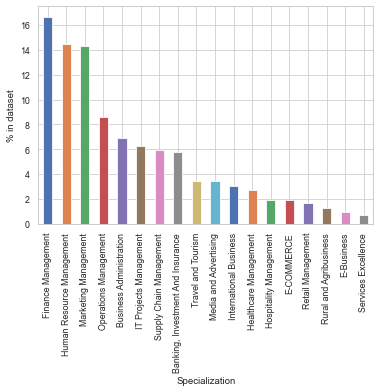

In [1949]:
percentage_plot("Specialization")

There are so many different specializations and it's not accurate to directly impute with the mean. It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [1950]:
# Creating a separate category "Others"

leads_new['Specialization'] = leads_new['Specialization'].replace(np.nan, 'Others')

#### ii. Tags

Tags column has 36% missing values

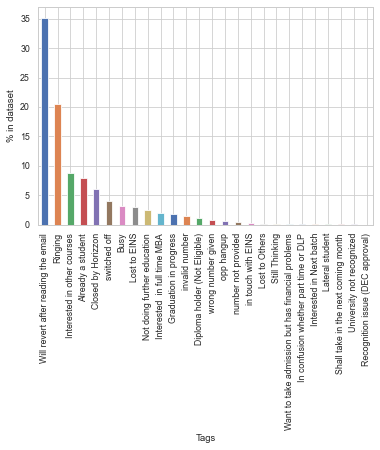

In [1951]:
percentage_plot("Tags")

The 'Will revert after reading the email' has the maximum percentage and hence the missing values in this column can be imputed with this value.

In [1952]:
# Imputing the missing data in the tags column with "Will revert after reading the email"

leads_new['Tags'] = leads_new['Tags'].replace(np.nan,'Will revert after reading the email')

#### iii. What matters most to you in choosing a course

"What matters most to you in choosing a course" has 29% missing values


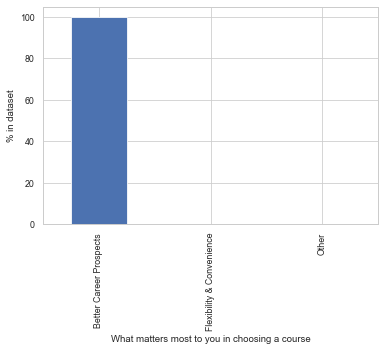

In [1953]:
percentage_plot("What matters most to you in choosing a course")

In [1954]:
# Finding the percentage of the different categories of this column

round(leads_new['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects     100.00
Flexibility & Convenience     0.00
Other                         0.00
Name: What matters most to you in choosing a course, dtype: float64

This column is highly skewed with "Better Career Prospects" having 100% values. Hence this column can be dropped

In [1955]:
# Drop this column 

leads_new = leads_new.drop('What matters most to you in choosing a course',axis=1)

#### iv. 'What is your current occupation'

This column has 29% of missing values

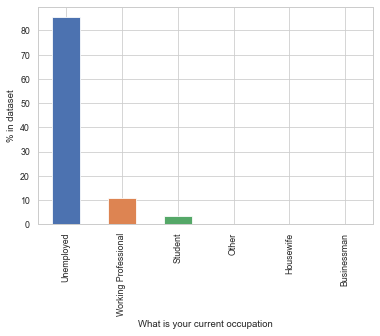

In [1956]:
percentage_plot("What is your current occupation")

Since the most occurring value is "Unemployed" we can impute this value in place of missing values.

In [1957]:
# Imputing the missing values in the 'What is your current occupation' column with 'Unemployed'

leads_new['What is your current occupation'] = leads_new['What is your current occupation'].replace(np.nan,'Unemployed')

In [1958]:
round(100*(leads_new.isnull().sum()/len(leads_new.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                    26.63
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

#### v. "Country"

This column has 27% of missing values

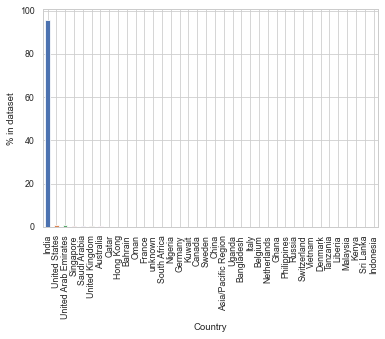

In [1959]:
percentage_plot("Country")

In [1960]:
# Finding the percentage of the different countries of this column

round(leads_new['Country'].value_counts(normalize=True),2)*100

India                  96.00
United States           1.00
United Arab Emirates    1.00
Singapore               0.00
Saudi Arabia            0.00
United Kingdom          0.00
Australia               0.00
Qatar                   0.00
Hong Kong               0.00
Bahrain                 0.00
Oman                    0.00
France                  0.00
unknown                 0.00
South Africa            0.00
Nigeria                 0.00
Germany                 0.00
Kuwait                  0.00
Canada                  0.00
Sweden                  0.00
China                   0.00
Asia/Pacific Region     0.00
Uganda                  0.00
Bangladesh              0.00
Italy                   0.00
Belgium                 0.00
Netherlands             0.00
Ghana                   0.00
Philippines             0.00
Russia                  0.00
Switzerland             0.00
Vietnam                 0.00
Denmark                 0.00
Tanzania                0.00
Liberia                 0.00
Malaysia      

We can observe that this column is also a highly skewed column but it is an important information with regard to the lead. Since most values are "India", we can impute missing values in this column with "India".

In [1961]:
# Imputing the missing values in the 'Country' coulmn

leads_new['Country'] = leads_new['Country'].replace(np.nan,'India')

In [1962]:
round(100*(leads_new.isnull().sum()/len(leads_new.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

#### vi. City

This column has 40% missing values

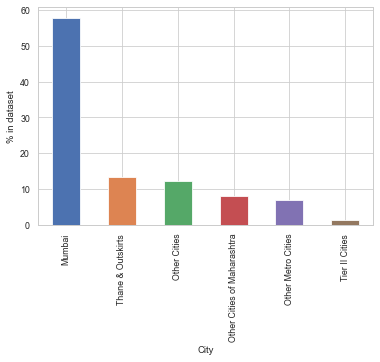

In [1963]:
percentage_plot("City")

In [1964]:
# Finding the percentage of the different cities of this column

round(leads_new['City'].value_counts(normalize=True),2)*100

Mumbai                        58.00
Thane & Outskirts             13.00
Other Cities                  12.00
Other Cities of Maharashtra    8.00
Other Metro Cities             7.00
Tier II Cities                 1.00
Name: City, dtype: float64

Around 60% of the City values are Mumbai. We can impute 'Mumbai' in place of the missing values.

In [1965]:
# Imputing the missing values in the 'City' coulmn with 'Mumbai'

leads_new['City'] = leads_new['City'].replace(np.nan,'Mumbai')

In [1966]:
round(100*(leads_new.isnull().sum()/len(leads_new.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                    0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                    

The remaining columns have missing values less than 2% and hence the corresponding rows can be dropped.

In [1967]:
# Dropping the rows with null values

leads_new.dropna(inplace = True)

In [1968]:
round(100*(leads_new.isnull().sum()/len(leads_new.index)), 2)

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Country                                    0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                    

There are no more missing values present in the dataset.

#### To find percentage of rows

In [1969]:
(len(leads_new.index)/9240)*100

98.2034632034632

So 98% of rows are retained after cleaning the dataset.

In [1970]:
leads_new.shape

(9074, 27)

## 4. Visualisation of the data

The target variable is "Converted". 

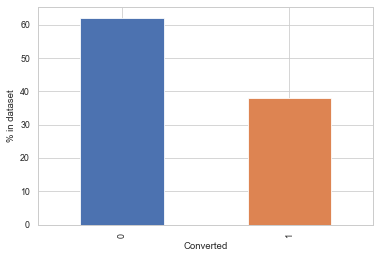

In [1971]:
# For the target variable 'Converted'

percentage_plot('Converted')

In [1972]:
(sum(leads_new['Converted'])/len(leads_new['Converted'].index))*100

37.85541106458012

From the above information we come to know that 37.8% leads are converted.

### Numerical Variable Analysis and Outlier treatment

In [1973]:
leads_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Country                                   9074 non-null   object 
 10  Specialization                      

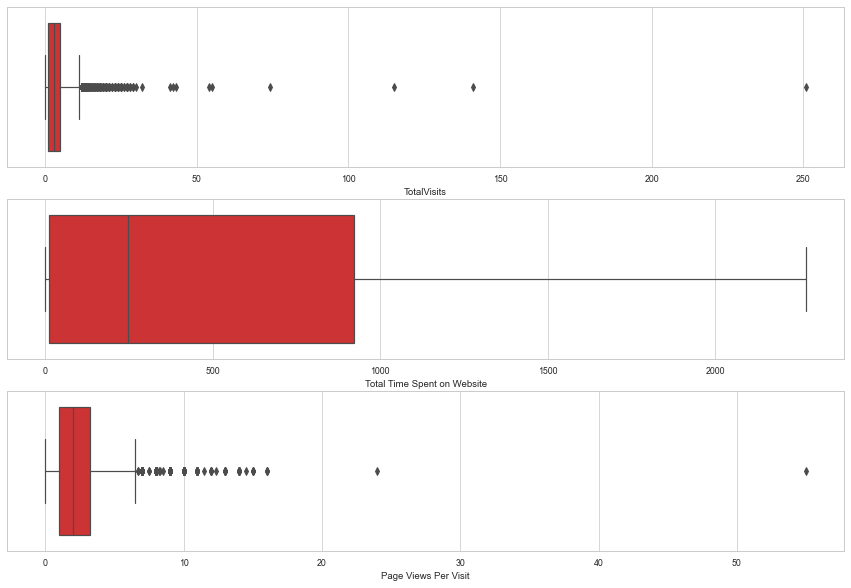

In [1974]:
# Boxplots for numerical variables

uni_num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10)) 
for i in uni_num_var:
    plt.subplot(3,1,uni_num_var.index(i)+1)
    sns.boxplot(leads_new[i], palette='Set1')
plt.show()

In [1975]:
leads_new[uni_num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00
mean,3.46,482.89,2.37
std,4.86,545.26,2.16
min,0.00,0.00,0.00
5%,0.00,0.00,0.00
25%,1.00,11.00,1.00
50%,3.00,246.00,2.00
75%,5.00,922.75,3.20
90%,7.00,1373.00,5.00
95%,10.00,1557.00,6.00


From the above boxplots, we find that there are outliers present in the variables.

- For 'TotalVisits', the 95% quantile is 10 but the maximum value is 251. Hence, we should cap these outliers at 95% value.
- There are no outliers in 'Total Time Spent on Website'
- Again for 'Page Views Per Visit' we should cap outliers at 95% value.



In [1976]:
# Treating Outliers

percentile = leads_new['TotalVisits'].quantile([0.95]).values
leads_new['TotalVisits'][leads_new['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = leads_new['Page Views Per Visit'].quantile([0.95]).values
leads_new['Page Views Per Visit'][leads_new['Page Views Per Visit'] >= percentile[0]] = percentile[0]

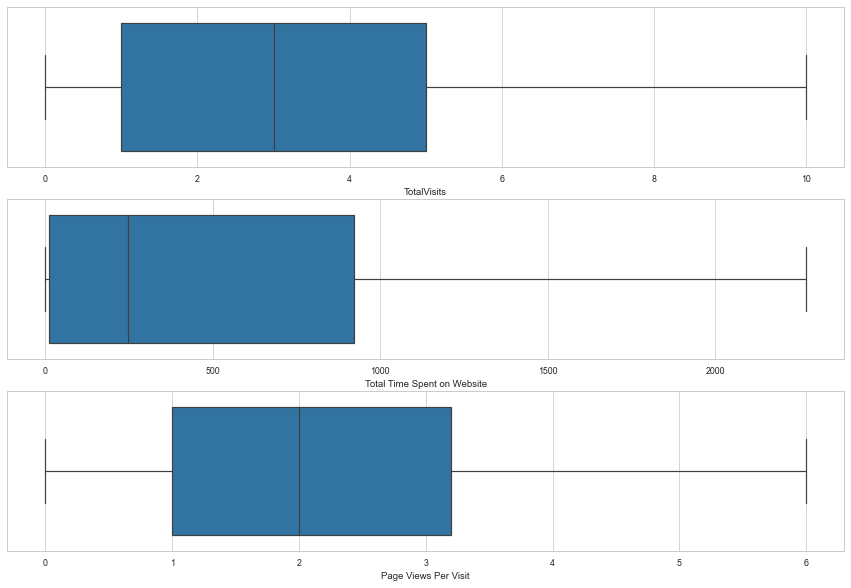

In [1977]:
# Plot to verify Boxplots

plt.figure(figsize=(15, 10))
for i in uni_num_var:
    plt.subplot(3,1,uni_num_var.index(i)+1)
    sns.boxplot(leads_new[i])
plt.show()

### Numerical variables against the target variable "Converted"

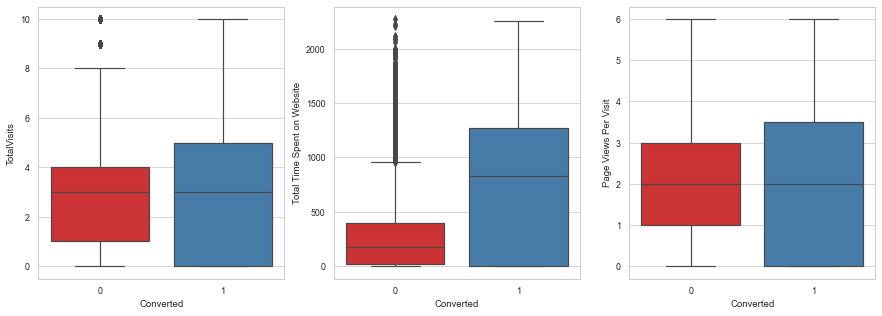

In [1978]:
# Plot numerical variables against target variable "Converted"

plt.figure(figsize=(15, 5))
for i in uni_num_var:
    plt.subplot(1, 3, uni_num_var.index(i)+1)
    sns.boxplot(y = i , x = 'Converted', data = leads_new, palette='Set1')
plt.show()

#### Insights:

- 'TotalVisits' has same median values for both converted and not converted leads. So no conclusion can be drwan from TotalVisits.
- People spending more time on the website are more likely to be converted. 
- 'Page Views Per Visit' also has same median values for both outputs of leads. Hence no conclusion can be drawn from this.

### Visualization of Categorical Variables

In [1979]:
# Categorical columns

leads_cat = list(leads_new.columns[leads_new.dtypes == 'object'])
leads_cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### Analysis of the categorical variables against the target variable "Converted"

In [1980]:
# Functions to plot countplots for categorical variables against the target variable "Converted"

# For single plot

def cat_var(var):
    plt.figure(figsize=(12,7))
    sns.countplot(x = var, hue = "Converted", data = leads_new, palette = "plasma")
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots 

def cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20,l*7))
    for i in lst:
        plt.subplot(l,2,lst.index(i)+1)
        sns.countplot(x = i, hue = "Converted", data = leads_new, palette = "plasma")
        plt.xticks(rotation = 90)
    plt.show()

#### 1. 'Lead Origin'

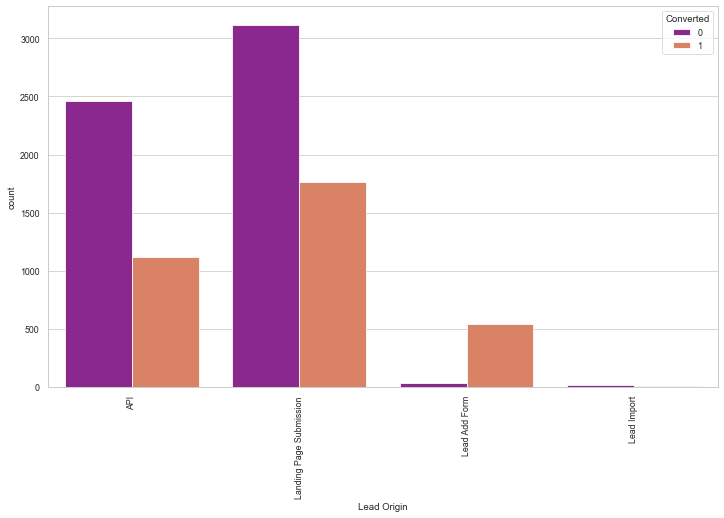

In [1981]:
cat_var(leads_cat[0])

#### Insights:
- 'API' and 'Landing Page Submission' generates the most leads but have less conversion rates. 
- 'Lead Add Form' generates less leads but conversion rate is greater. 
- 'Lead Import' does not seem to be very significant. 
- To improve we should try to increase lead conversion rate for 'API' and 'Landing Page Submission', and generate more leads from Lead Add Form. 
   

#### 2. Lead_Source

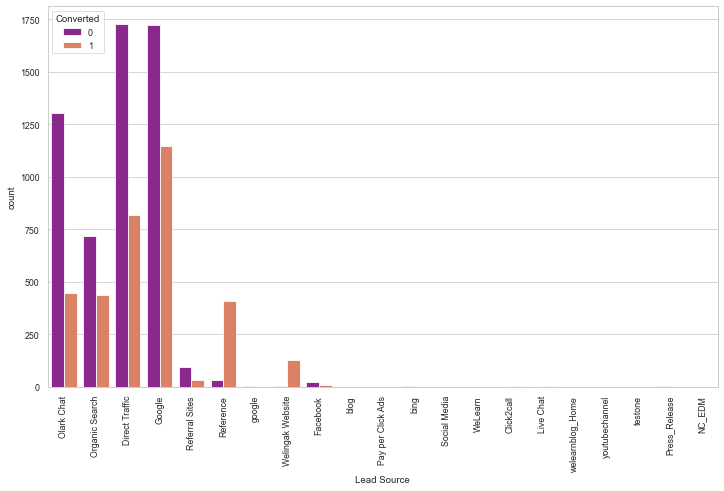

In [1982]:
cat_var(leads_cat[1])

In [1983]:
# Replace 'google' with 'Google'

leads_new['Lead Source'] = leads_new['Lead Source'].replace(['google'], 'Google')

In [1984]:
# Creating a new category 'Others' for some of the sources which do not have much values.

leads_new['Lead Source'] = leads_new['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

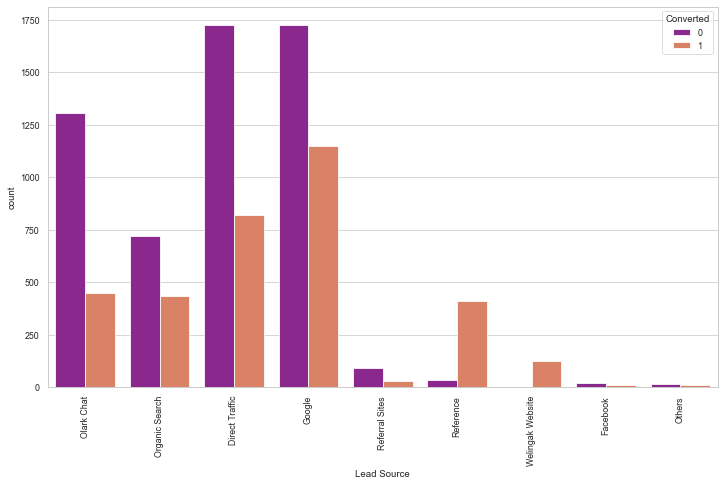

In [1985]:
cat_var(leads_cat[1])

#### Insights:
- There are both 'google' and 'Google'. Hence we have changed to 'Google'
- As it can be seen from the plot, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. So we have converted all these sources to one single category named 'Others'.
- 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads.
- More leads has to be generated from reference and welingak website.

#### 3. 'Do Not Email' and 'Do Not Call'

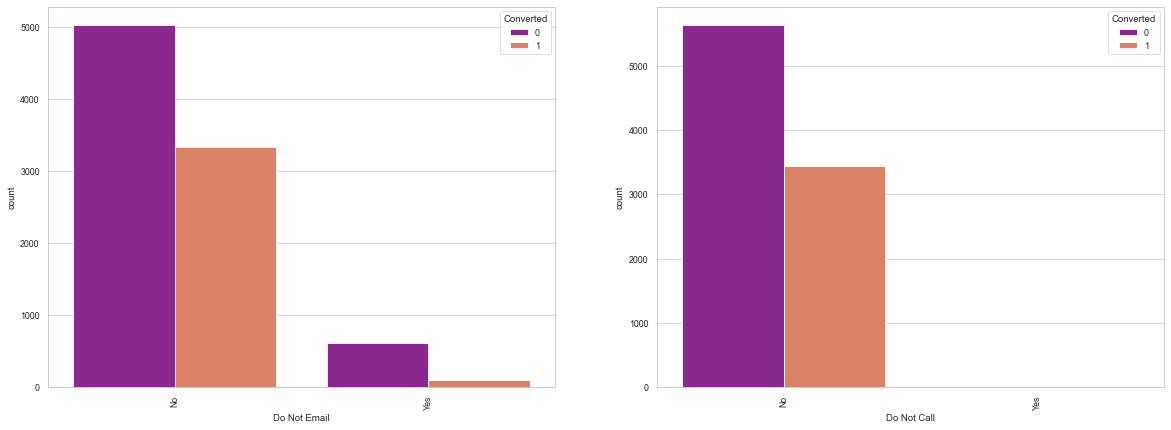

In [1986]:
cat_vars([leads_cat[2], leads_cat[3]])

#### Insight:
- Most of the responses are 'No' for both the variables which generated most of the leads. Nothng significant can be inferred from these attributes.    

#### 4. Last Activity

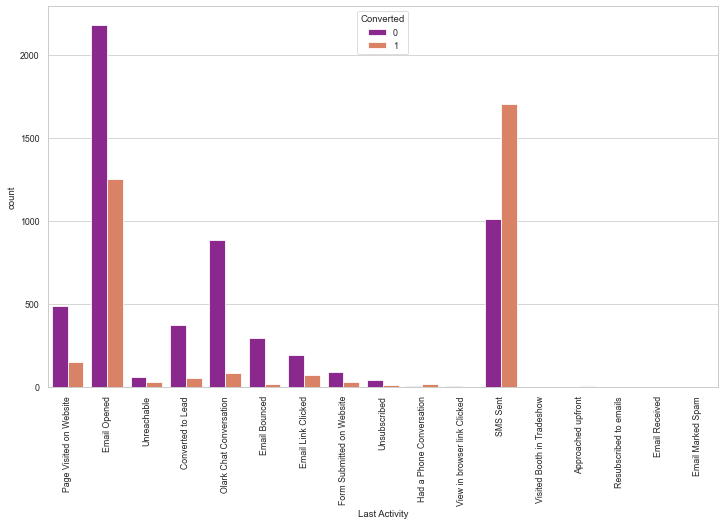

In [1987]:
cat_var(leads_cat[4])

In [1988]:
leads_new['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [1989]:
# We can club the last activities to "Other Activities" which are having less data.

leads_new['Last Activity'] = leads_new['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activities')

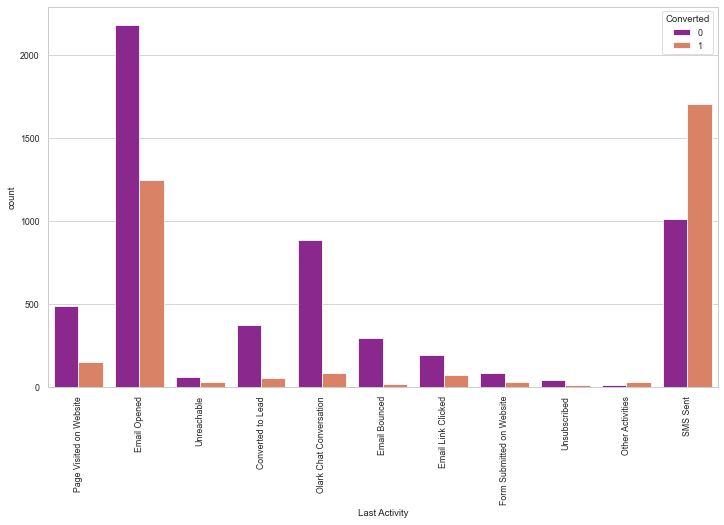

In [1990]:
# Plot new categories

cat_var(leads_cat[4])

#### Insights:`
- Highest number of lead generated is 'Email Opened' while the maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
- Categories after "SMS sent" are having very less data. So these have been be grouped into a new category named "Other Activities"

#### 5. Country

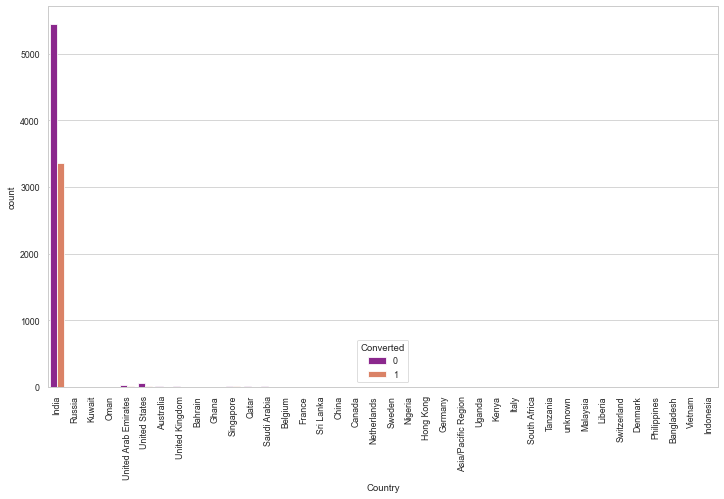

In [1991]:
cat_var(leads_cat[5])

#### Insight:
- Most of the responses are for India. Remaining categories are not significant.

#### 6. Specialization

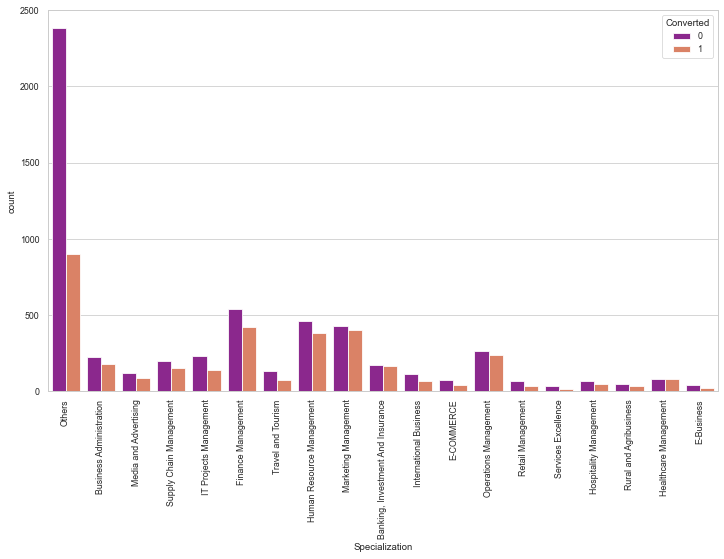

In [1992]:
cat_var(leads_cat[6])

#### Insight:
- Conversion rates are mostly same across different specializations.

#### 7. What is your current occupation

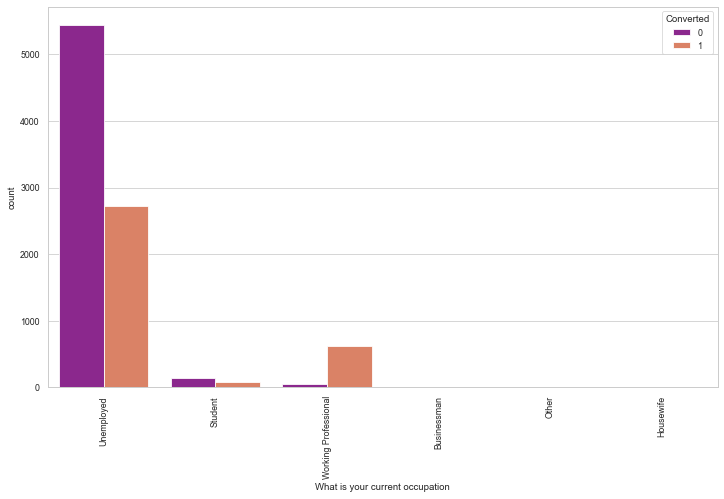

In [1993]:
cat_var(leads_cat[7])

#### Insight:
- The highest conversion rate is for 'Working Professional'. 
- High number of leads are generated for 'Unemployed' but conversion rate is low.    

#### 8. 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',

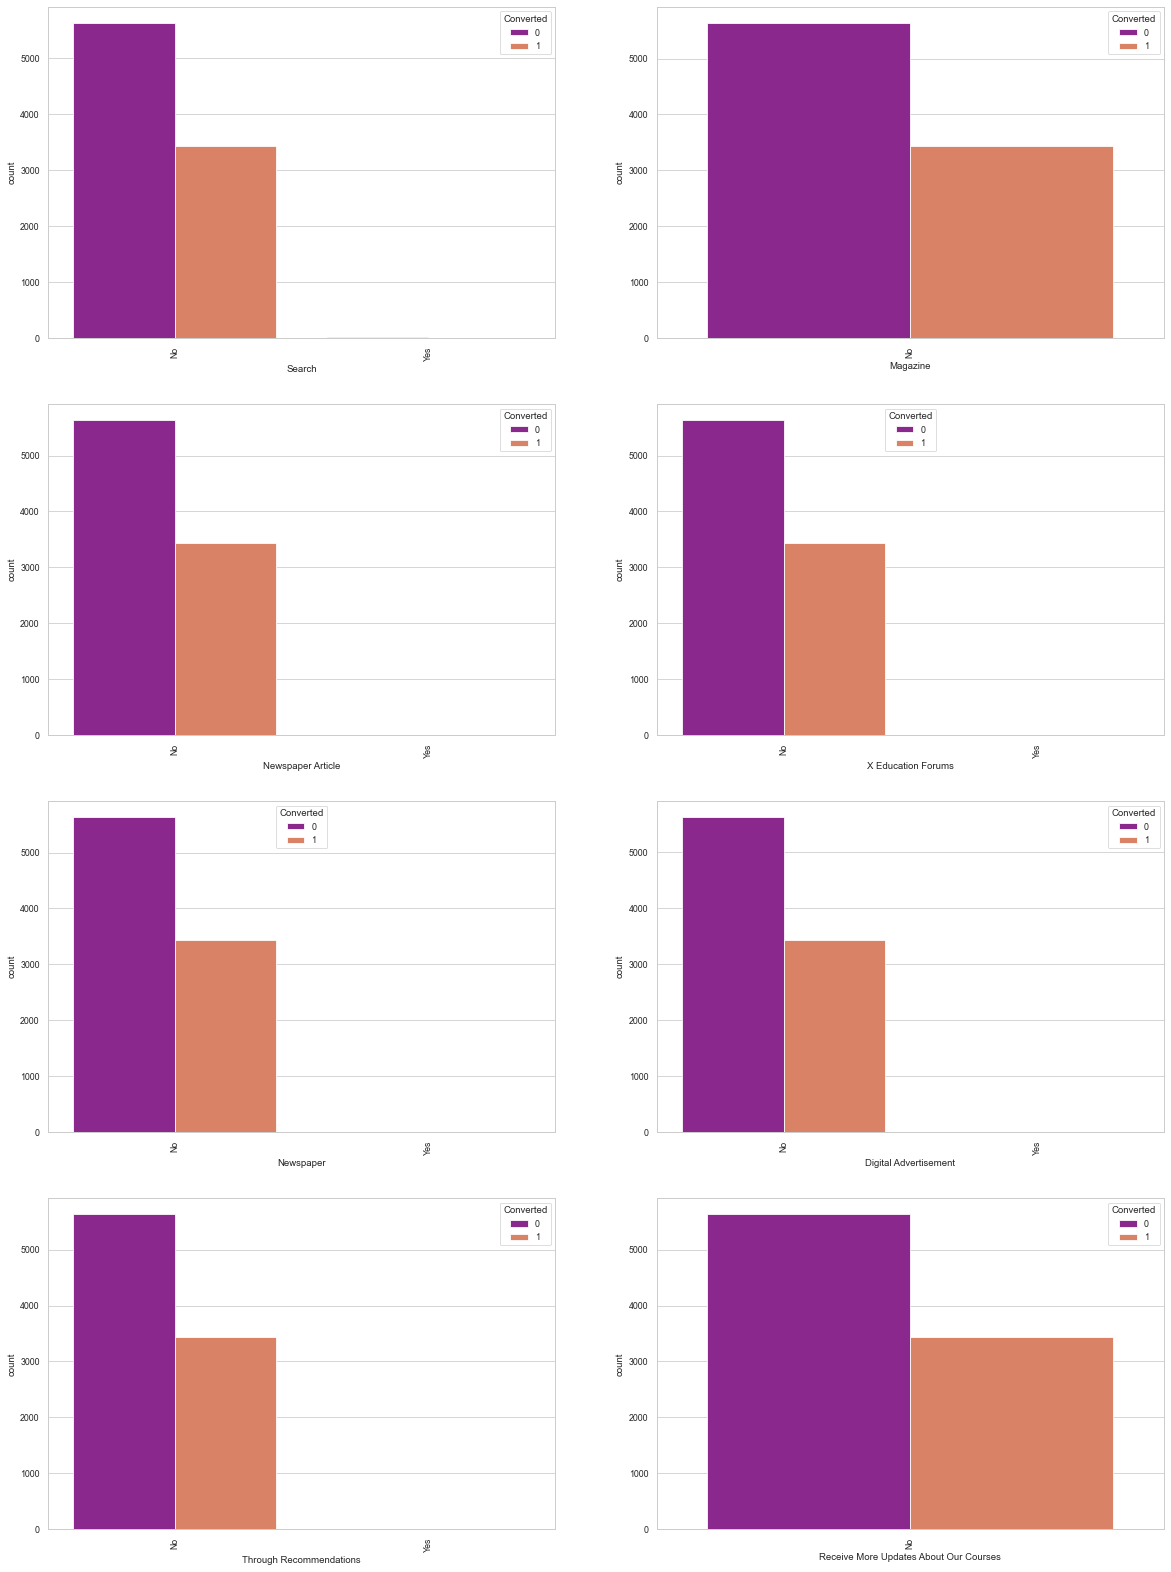

In [1994]:
cat_vars(leads_cat[8:16])

In [1995]:
leads_new.Search.value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

In [1996]:
leads_new.Magazine.value_counts(dropna=False)

No    9074
Name: Magazine, dtype: int64

In [1997]:
leads_new['Newspaper Article'].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [1998]:
leads_new['X Education Forums'].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [1999]:
leads_new['Newspaper'].value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [2000]:
leads_new['Digital Advertisement'].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [2001]:
leads_new['Through Recommendations'].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [2002]:
leads_new['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

#### Insight:
- As all the above variables have most of the values as no, nothing significant can be inferred from these plots.    

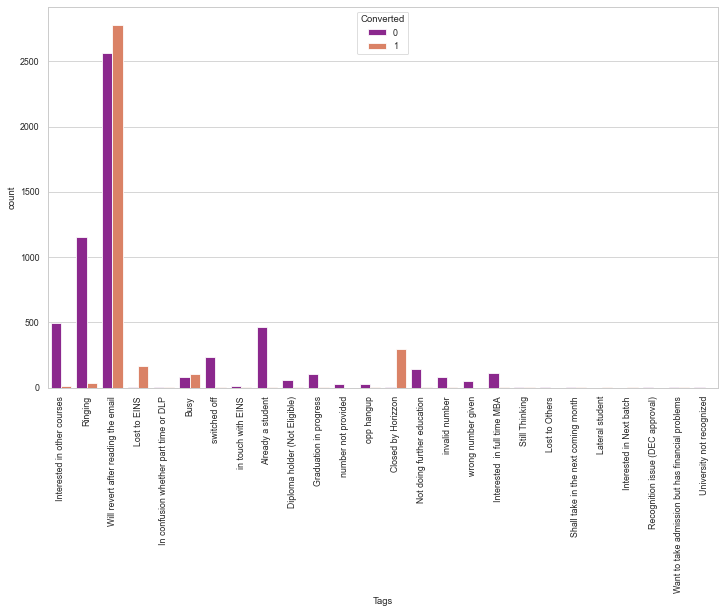

In [2003]:
cat_var(leads_cat[16])

In [2004]:
# To club the categories as "Other Tags"

leads_new['Tags'] = leads_new['Tags'].replace(['Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], 'Other Tags')

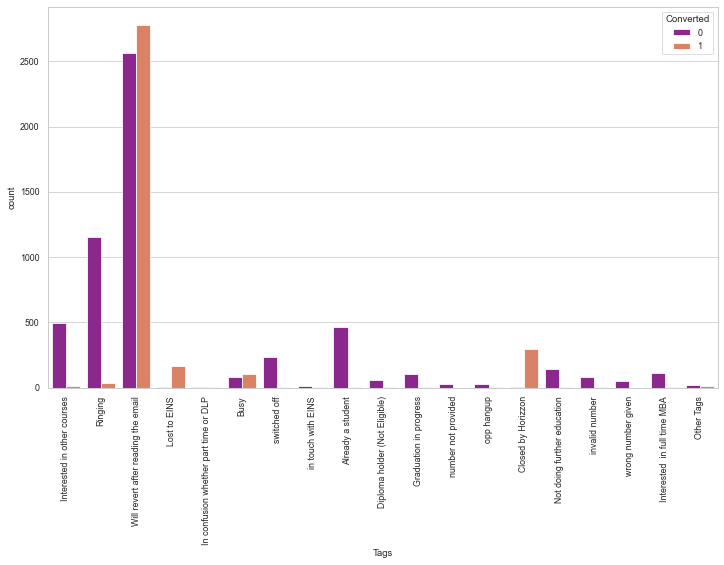

In [2005]:
cat_var(leads_cat[16])

#### Insights:
- In Tags, categories after 'Interested in full time MBA' have very few leads generated. Hence we have combined them into one single category as "Other Tags".
- Most leads generated and the highest conversion rate are both from the attribute 'Will revert after reading the email'.


#### 9. 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'

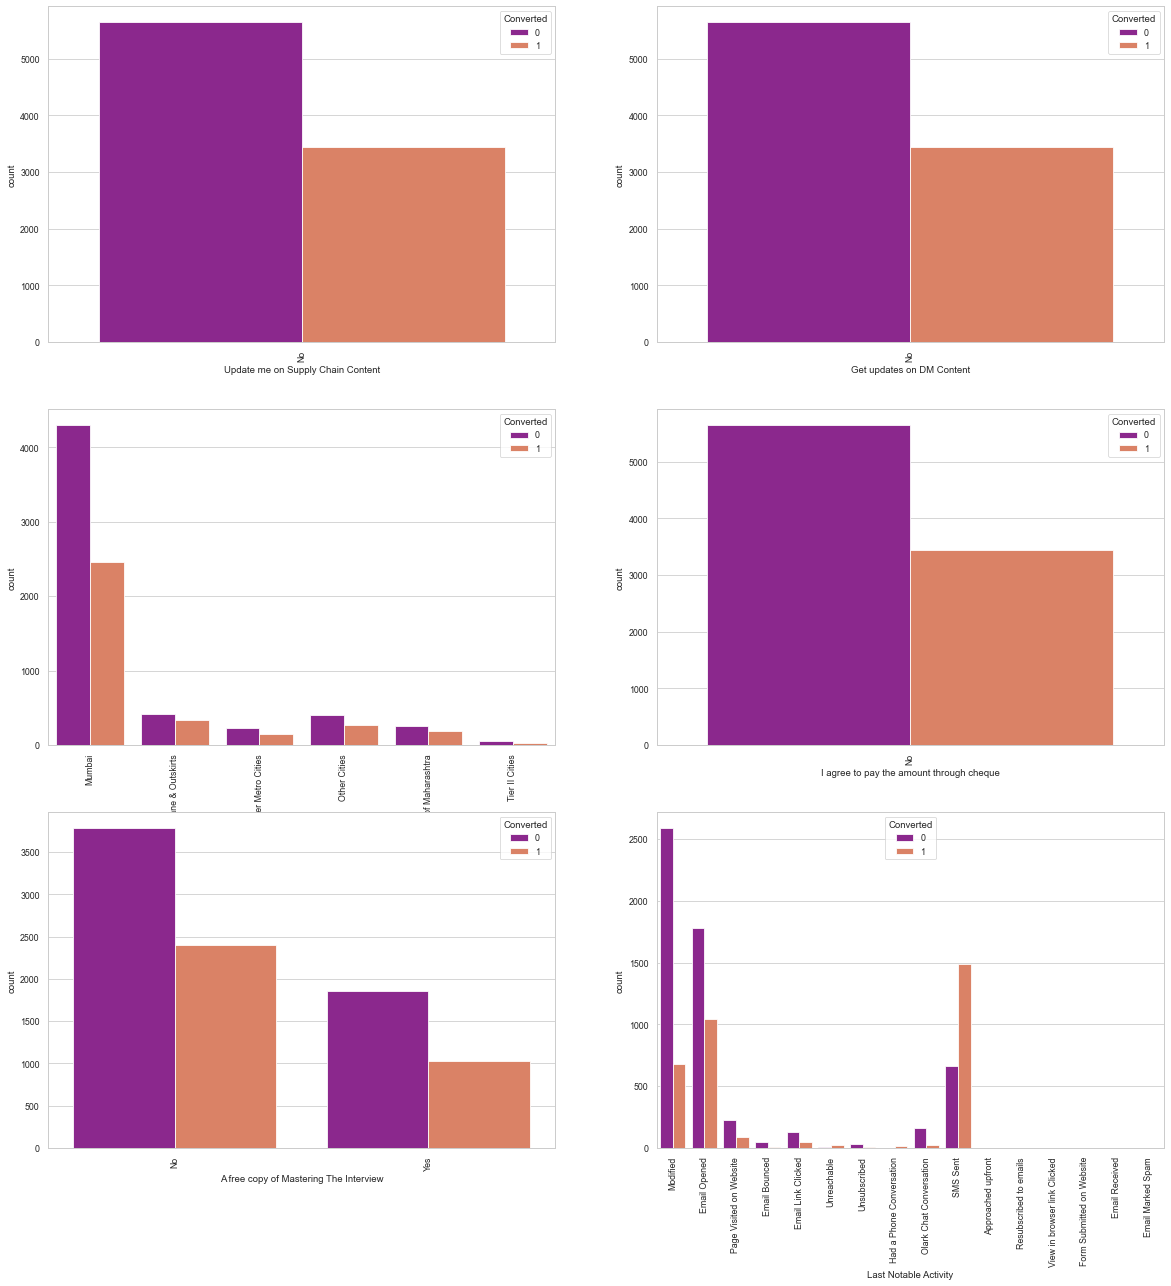

In [2006]:
cat_vars(leads_cat[17:23])

In [2007]:
leads_new['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [2008]:
leads_new['Get updates on DM Content'].value_counts(dropna=False)

No    9074
Name: Get updates on DM Content, dtype: int64

In [2009]:
leads_new['City'].value_counts(dropna=False)

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [2010]:
leads_new['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [2011]:
leads_new['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [2012]:
leads_new['Last Notable Activity'] = leads_new['Last Notable Activity'].replace(['Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 'Others')

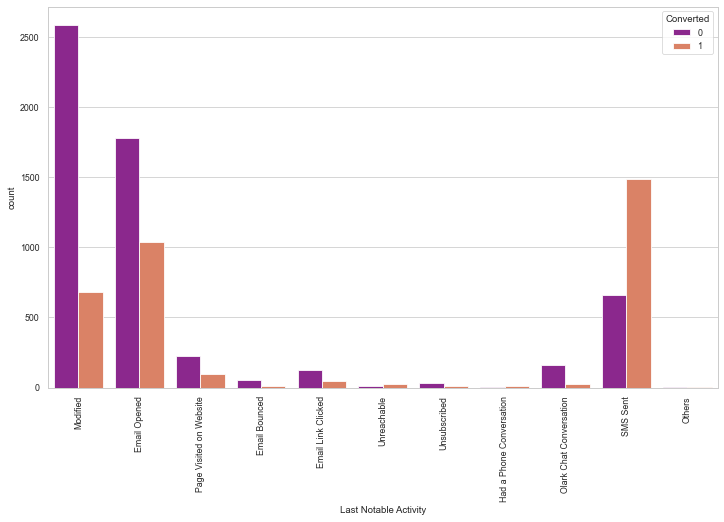

In [2013]:
cat_var(leads_cat[22])

#### Insights:
- Most of these variables have only one significant category 'NO' and hence they are insignificant in analysis.
- In City, most of the leads are generated for 'Mumbai'.
- In 'Last Notable Activity', we have combined categories after 'SMS Sent' to a new category 'Others' as they have very less data. The most generated leads are for the category 'Modified' while most conversion rate are for 'SMS Sent' activity.   
    

#### Inference:

Based on the above data visualization, we can drop the variables which are not significant for analysis and will not provide any information to the model.

In [2014]:
leads_new.shape

(9074, 27)

In [2015]:
leads_new = leads_new.drop(['Do Not Call','Country','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque'], 1)

In [2016]:
leads_new.shape

(9074, 14)

In [2017]:
leads_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [2018]:
leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [2019]:
leads_new.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00,9074.00
mean,0.38,3.19,482.89,2.27
std,0.49,2.78,545.26,1.79
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,11.00,1.00
50%,0.00,3.00,246.00,2.00
75%,1.00,5.00,922.75,3.20
max,1.00,10.00,2272.00,6.00


## 5. Data Preparation for building the Model

- Creating Dummy variables for Categorical Data
- Splitting the data
- Scaling the features

In [2020]:
# Converting Binary variable (Yes/No) to (0/1)

leads_new['Do Not Email'] = leads_new['Do Not Email'].map({'Yes': 1, 'No': 0})

### 5.1 Creating Dummy variables for Categorical Data

In [2021]:
leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,0,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


There are few columns which are having more than 2 categorical values. In order to perform logistic regression dummy variables has to be created for these categorical columns.

- Create Dummy variable
- Drop original variable for which the dummy was created
- Drop first dummy variable for each set of dummies created.

In [2022]:
# Categorical variables

cat_var_new = list(leads_new.columns[leads_new.dtypes == 'object'])
cat_var_new

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [2023]:
# To create dummy variables and drop first ones

dummy_var = pd.get_dummies(leads_new[cat_var_new], drop_first = True)

#### Merge the dataframe, with the dummy variable dataset.

In [2024]:
# To add result to the original dataframe

leads_new = pd.concat([leads_new, dummy_var], axis = 1)
leads_new.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,0,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Dropping unnecessary columns as we have already created dummy variable.

In [2025]:
# To drop the original variables

leads_new = leads_new.drop(cat_var_new, 1)

In [2026]:
leads_new.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 5.2 Splitting the data - Train Test Data

The dataset is splitted into

- Train data
- Test data

In [2027]:
# To put feature variable to X
X = leads_new.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [2028]:
# Response variable y

y = leads_new['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2029]:
# To split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [2030]:
X_train.shape

(6351, 82)

In [2031]:
X_test.shape

(2723, 82)

### 5.3 Scaling the Features

In [2032]:
scaler = StandardScaler()

In [2033]:
# Numerical variables

uni_num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [2034]:
X_train[uni_num_var] = scaler.fit_transform(X_train[uni_num_var])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,-0.43,-0.16,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1012,1,-0.43,-0.54,-0.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.15,-0.89,-1.27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,0,-0.43,1.64,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7987,0,0.64,2.02,0.12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [2035]:
# To check the lead conversion rate

conversion_rate = (sum(leads_new['Converted'])/len(leads_new['Converted'].index))*100
conversion_rate

37.85541106458012

We have 37.8% conversion rate

## 6. Building the Model

The following steps are followed in building a model:

- Import the necessary packages for model preprocessing and model building
- Build the model using a combination of automatic and manual processing
- Start the model with RFE features (automatic) and drop the features,
- Use manual processing for feature reduction by dropping one feature at a time using the p value and VIF.
- Build the model and fit the training data.

### 6.1 RFE (Recursive Feature Elimination)

In [2036]:
logreg = LogisticRegression()

In [2037]:
# Running RFE with 15 variables as output

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [2038]:
# To check output of RFE

rfe.support_

array([ True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [2039]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 68),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Others', False, 48),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 31),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 67),
 ('Last Activity_Form Submitted on Website', False, 49),
 ('Last Activity_Olark Chat Conversation', False, 18),
 ('Last Activity_Other Activities', True, 1),
 ('Last Activity_Page Visited on Website', False, 43),
 ('Last Activity_SMS Sent', False, 8),
 ('Last Activity

In [2040]:
# Variables selected using RFE

cols = X_train.columns[rfe.support_]
print(cols)

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other Activities', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Last Notable Activity_SMS Sent'],
      dtype='object')


In [2041]:
# Checking for columns which has been rejected

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Internati

### 6.2 Assessing the Model with StatsModels

#### Function for building the model

In [2042]:
def build_model(X,y):
    # To add a constant
    X_sm = sm.add_constant(X)   
    
    # To fit the model
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()  
    
    # Summary of the model 
    print(logm.summary())     
    return X_sm, logm

#### Function to calculate Variance Inflation Factor (VIF)

In [2043]:
def model_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif_leads = pd.DataFrame()
    vif_leads['Features'] = X.columns
    vif_leads['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_leads['VIF'] = round(vif_leads['VIF'], 2)
    return vif_leads.sort_values(by = "VIF", ascending = False)

#### Function to get predicted values on train set

In [2044]:
def leads_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

#### Function to get confusion matrix and accuracy

In [2045]:
def conf_mat_leads(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted)
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

#### Function for calculating metric beyond accuracy

In [2046]:
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))
    

### 6.2.1 Model 1

In [2047]:
X1, logm1 = build_model(X_train[cols],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1959.8
Date:                Tue, 18 Oct 2022   Deviance:                       3919.6
Time:                        23:25:00   Pearson chi2:                 1.07e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Tags_invalid number has a very high p-value of 0.999. It is insignificant and can be dropped.

### 6.2.2 Model 2

In [2048]:
col1 = cols.drop('Tags_invalid number',1)

In [2049]:
# To rebuild the model

X2, logm2 = build_model(X_train[col1], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1962.9
Date:                Tue, 18 Oct 2022   Deviance:                       3925.7
Time:                        23:25:01   Pearson chi2:                 1.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

All of the features have p-value close to zero and hence they all are seem to be significant.

#### To check VIFs

In [2050]:
model_VIF(X2)

,Features,VIF
7,What is your current occupation_Unemployed,7.16
1,Lead Origin_Landing Page Submission,4.44
6,Specialization_Others,3.41
12,Tags_Will revert after reading the email,3.35
2,Lead Origin_Lead Add Form,1.68
11,Tags_Ringing,1.63
13,Last Notable Activity_SMS Sent,1.46
3,Lead Source_Welingak Website,1.34
9,Tags_Closed by Horizzon,1.24
0,Do Not Email,1.18


The feature "What is your current occupation_Unemployed" has a VIF value > 5 i.e., 7.16 and hence can be dropped.

### 6.2.3 Model 3

In [2051]:
# Dropping the column 'What is your current occupation_Unemployed' due to high VIF

col1 = col1.drop('What is your current occupation_Unemployed')

In [2052]:
# To rebuild the model

X3, logm3 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2063.1
Date:                Tue, 18 Oct 2022   Deviance:                       4126.3
Time:                        23:25:01   Pearson chi2:                 1.03e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [2053]:
model_VIF(X3)

,Features,VIF
11,Tags_Will revert after reading the email,3.03
1,Lead Origin_Landing Page Submission,2.55
6,Specialization_Others,1.94
2,Lead Origin_Lead Add Form,1.66
10,Tags_Ringing,1.52
12,Last Notable Activity_SMS Sent,1.46
3,Lead Source_Welingak Website,1.34
8,Tags_Closed by Horizzon,1.23
0,Do Not Email,1.18
7,Tags_Busy,1.09


#### Inference:

Since the P values of all variables is close to 0 and VIF values are low i.e. below 5 for all the variables, Model 3 is our final model. We have 13 variables in our final model.

<AxesSubplot:>

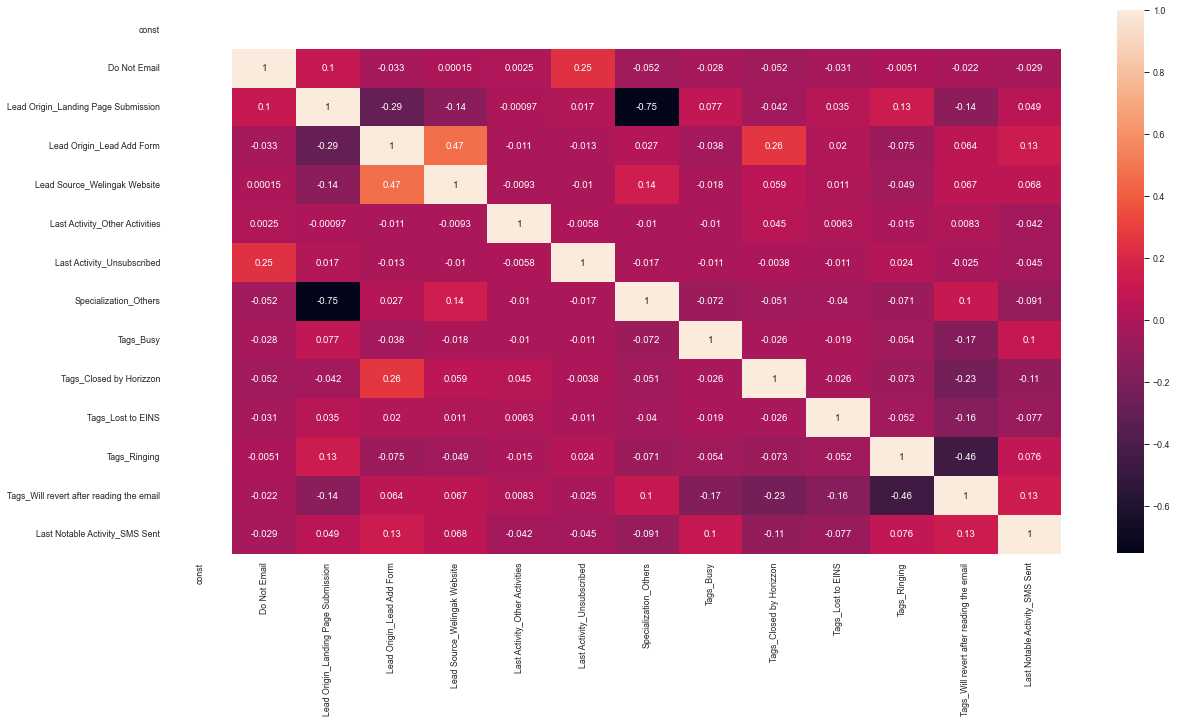

In [2054]:
# To plot correlations

plt.figure(figsize = (20,10))  
sns.heatmap(X3.corr(),annot = True)

From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model as final model.

## 7. Making Prediction on the Train dataset

The following steps are done after building the model:

- Get the predictions on the training dataset with the final model
- Use the cut-off with 0.5 for the initial predictions
- Derive the Classification report and Classification metrics with the initial cutoff and predictions
- Derive the Area under the ROC curve for the initial cut-off and predictions


In [2055]:
# To get predicted values on train dataset

y_train_pred_final = leads_pred(X3,logm3)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.42,3009,0
1,0,0.01,1012,0
2,0,0.00,9226,0
3,1,0.92,4750,1
4,1,0.98,7987,1


### Confusion Matrix and Accuracy

In [2056]:
confusion = conf_mat_leads(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3744  161]
 [ 758 1688]]
Training Accuracy:  0.8552983782081562


### Metrics beyond simply accuracy

In [2057]:
other_metrics(confusion)

Sensitivity:  0.6901062959934587
Specificity:  0.9587708066581306
False postive rate - predicting the lead conversion when the lead does not convert:  0.0412291933418694
Positive predictive value:  0.9129259058950784
Negative predictive value:  0.8316303864948912


We found out that our specificity is good (~96%) but our sensitivity was only 69%. Hence, this has to be taken cared of. Sensitivity of 69% was mainly due to the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [2058]:
# Function to plot ROC

def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [2059]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

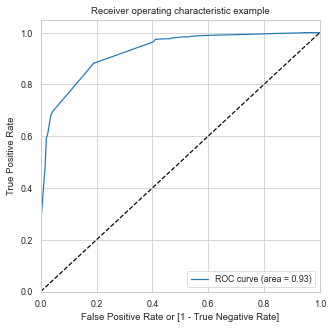

In [2060]:
# To plot ROC

plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [2061]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))


Area under curve:  0.9268875050645806


### Finding Optimal Cutoff Point

We had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [2062]:
# To create columns with different probability cutoffs 

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.42,3009,0,1,1,1,1,1,0,0,0,0,0
1,0,0.01,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.92,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1


 Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.


In [2063]:
cutoff_leads = pd.DataFrame(columns = ['prob','accuracy','sensit','specif'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specif = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensit = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_leads.loc[i] =[i, accuracy, sensit, specif]
print(cutoff_leads)

      prob  accuracy  sensit  specif
0.00  0.00      0.39    1.00    0.00
0.10  0.10      0.71    0.98    0.54
0.20  0.20      0.74    0.97    0.59
0.30  0.30      0.84    0.88    0.81
0.40  0.40      0.84    0.88    0.81
0.50  0.50      0.86    0.69    0.96
0.60  0.60      0.86    0.69    0.96
0.70  0.70      0.85    0.68    0.96
0.80  0.80      0.83    0.61    0.98
0.90  0.90      0.79    0.49    0.98


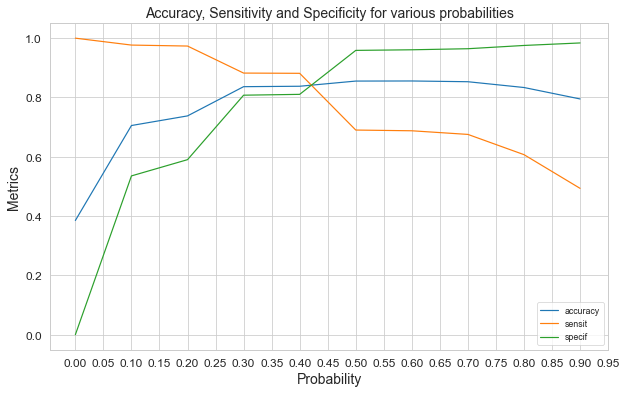

In [2064]:
# To plot accuracy, sensitivity and specificity for various probabilities

# sns.set_style('white')
# cutoff_leads.plot.line(x='prob', y=['accuracy','sensit','specif'])
# plt.show()

# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_leads.plot.line(x='prob', y=['accuracy','sensit','specif'], figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [2065]:
# Using 0.42 threshold for predictions

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.42,3009,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.01,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.92,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score to the Train data

In [2066]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.42,3009,0,1,1,1,1,1,0,0,0,0,0,1,42
1,0,0.01,1012,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.92,4750,1,1,1,1,1,1,1,1,1,1,1,1,92
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


## 8. Evaluation of the Model

- Calculate the predicted values for the different cut-offs to arrive at the optimal cutoff
- Plot the Sensitivity / Specificity curve for the different cut-offs and identify the optimal cut-off
- Get the final_Predictions and the metrics for the Predictions with the optimal cut-off
- Assign a Lead Score to the Training dataset based on the Conversion probability of the final_Predictions
- Measuring the Precision Recall Trade-off

### Confusion Matrix and Overall Accuracy

In [2067]:
# Confusion matrix and Overall Accuracy

confusion2 = conf_mat_leads(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3167  738]
 [ 291 2155]]
Training Accuracy:  0.8379782711384034


### Other metrics

In [2068]:
# Other metrics

other_metrics(confusion2)

Sensitivity:  0.8810302534750614
Specificity:  0.81101152368758
False postive rate - predicting the lead conversion when the lead does not convert:  0.18898847631241997
Positive predictive value:  0.7449014863463532
Negative predictive value:  0.9158473105841527


### Classification Report

In [2069]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3905
           1       0.74      0.88      0.81      2446

    accuracy                           0.84      6351
   macro avg       0.83      0.85      0.83      6351
weighted avg       0.85      0.84      0.84      6351



### Precision and Recall

- Precision: Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.

- Recall: Also known as Sensitivity, it refers to the percentage of total relevant results correctly classified by the algorithm.

#### Precision = TP / TP + FP

In [2070]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9129259058950784

#### Recall = TP / TP + FN

In [2071]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6901062959934587

In [2072]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9129259058950784

In [2073]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6901062959934587

### Precision and Recall Tradeoff

In [2074]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [2075]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

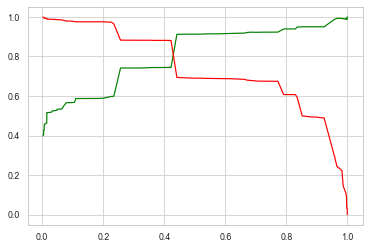

In [2076]:
# To plot precision vs recall for different thresholds

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, 0.42 is the optimum point to take as a cutoff probability using Precision-Recall. Lets check our accuracy using this cutoff too.

In [2077]:
# Using 0.42 threshold for predictions

y_train_pred_final['final_predicted_new'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,final_predicted_new
0,0,0.42,3009,0,1,1,1,1,1,0,0,0,0,0,1,42,1
1,0,0.01,1012,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.92,4750,1,1,1,1,1,1,1,1,1,1,1,1,92,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1,98,1


In [2078]:
# Confusion matrix and overall accuracy

confusion3 = conf_mat_leads(y_train_pred_final.Converted,y_train_pred_final.final_predicted_new)

Confusion Matrix:
[[3167  738]
 [ 291 2155]]
Training Accuracy:  0.8379782711384034


In [2079]:
# Other metrics

other_metrics(confusion3)

Sensitivity:  0.8810302534750614
Specificity:  0.81101152368758
False postive rate - predicting the lead conversion when the lead does not convert:  0.18898847631241997
Positive predictive value:  0.7449014863463532
Negative predictive value:  0.9158473105841527


Overall the Accuracy and other metrics yield similar values for both the cutoffs. We'll use the cutoff of 0.42 as derived earlier.

## 9. Making Predictions on the Test Set

The next step is to validate the model with the test dataset.

The following are the steps invoved:

- Fit the Numeric features of the Test dataset with the Scaler method
- Making Predictions on the X_test dataset
- Create a Dataset with the Prospect ID and the conversion probability for the test dataset
- Generate the Lead Score for the test dataset based on the predicted probability from the model
- Get the final Predicted values using the optimal threshold value
- Get the Final evaluation Metrics for the test dataset with the actual converted values and final predicted values

### Feature scaling of test data

In [2080]:
# Feature transform on Test set

X_test[uni_num_var] = scaler.fit_transform(X_test[uni_num_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0.30,-0.59,1.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1490,0,0.67,1.89,1.56,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
7936,0,-0.42,-0.74,-0.13,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4216,0,-1.14,-0.88,-1.27,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3830,0,1.75,-0.58,2.13,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [2081]:
# # Assigning the columns selected by the final model to the X_test 

X_test_sm = X_test[col1]
X_test_sm.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Other Activities,Last Activity_Unsubscribed,Specialization_Others,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,1,0,0,0,0,1,0
1490,0,1,0,0,0,0,0,0,0,0,0,1,0
7936,0,0,0,0,0,0,1,0,0,0,0,1,0
4216,0,0,1,0,0,0,0,0,1,0,0,0,0
3830,0,1,0,0,0,0,0,0,0,0,0,1,0


In [2082]:
# Adding a constant

X_test_sm = sm.add_constant(X_test_sm)

In [2083]:
# Making predictions

y_test_pred = logm3.predict(X_test_sm)

y_test_pred[:10]

3271   0.23
1490   0.42
7936   0.23
4216   1.00
3830   0.42
1800   0.42
6507   0.07
4821   0.01
4223   0.97
4714   0.23
dtype: float64

In [2084]:
# To convert y_pred to a dataframe which is an array

y_pred_new = pd.DataFrame(y_test_pred)

y_pred_new.head()

,0
3271,0.23
1490,0.42
7936,0.23
4216,1.00
3830,0.42


In [2085]:
# To convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [2086]:
# Putting Lead ID to index

y_test_df['Lead ID'] = y_test_df.index

In [2087]:
y_test_df.head()

,Converted,Lead ID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830


In [2088]:
# To remove index for both dataframes to append them side by side 

y_pred_new.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2089]:
# To append y_test_df and y_pred_new

y_pred_final = pd.concat([y_test_df, y_pred_new],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.23
1,1,1490,0.42
2,0,7936,0.23
3,1,4216,1.00
4,0,3830,0.42


In [2090]:
# To Rename the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.23
1,1,1490,0.42
2,0,7936,0.23
3,1,4216,1.00
4,0,3830,0.42


In [2091]:
# To put the threshold of 0.42 as derived

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.23,0
1,1,1490,0.42,1
2,0,7936,0.23,0
3,1,4216,1.00,1
4,0,3830,0.42,1


In [2092]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9119842488830422


In [2093]:
# Confusion matrix and overall accuracy

confusion_test_leads = conf_mat_leads(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1396  338]
 [ 137  852]]
Training Accuracy:  0.8255600440690415


In [2094]:
# Other metrics

other_metrics(confusion_test_leads)

Sensitivity:  0.8614762386248737
Specificity:  0.8050749711649365
False postive rate - predicting the lead conversion when the lead does not convert:  0.19492502883506344
Positive predictive value:  0.7159663865546219
Negative predictive value:  0.9106327462491846


### Assigning Lead Score to the Testing data

Lead Score = 100 * ConversionProbability

The Lead Score has to be calculated for all the leads from the original dataset (train + test).

In [2095]:
# To select test set

leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.23,0
1,1,1490,0.42,1
2,0,7936,0.23,0
3,1,4216,1.00,1
4,0,3830,0.42,1


In [2096]:
# To select train set

leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,final_predicted_new
0,0,0.42,3009,0,1,1,1,1,1,0,0,0,0,0,1,42,1
1,0,0.01,1012,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.92,4750,1,1,1,1,1,1,1,1,1,1,1,1,92,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1,98,1


In [2097]:
# To drop unnecessary columns from train set

leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.42,1
1,1012,0,0.01,0
2,9226,0,0.00,0
3,4750,1,0.92,1
4,7987,1,0.98,1


In [2098]:
# Concatenating the two datasets

lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.42,1
1,1012,0,0.01,0
2,9226,0,0.00,0
3,4750,1,0.92,1
4,7987,1,0.98,1


In [2099]:
# To inspect the shape of the final dataset

print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [2100]:
# To ensure uniqueness of Lead IDs

len(lead_full_pred['Lead ID'].unique().tolist())

9074

In [2101]:
# To calculate the Lead Score

lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3009,0,0.42,1,42
1,1012,0,0.01,0,1
2,9226,0,0.00,0,0
3,4750,1,0.92,1,92
4,7987,1,0.98,1,98


In [2102]:
# To make the Lead ID column as index

lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.01,0,1
1,0,0.00,0,0
2,1,0.42,1,42
3,0,0.00,0,0
4,1,0.06,0,6


In [2103]:
# To get Lead Number column from original data

leads_original = leads_df[['Lead Number']]
leads_original.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [2104]:
# To concatenate the 2 dataframes based on index

leads_score = pd.concat([leads_original, lead_full_pred], axis=1)
leads_score.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0.00,0.01,0.00,1.00
1,660728,0.00,0.00,0.00,0.00
2,660727,1.00,0.42,1.00,42.00
3,660719,0.00,0.00,0.00,0.00
4,660681,1.00,0.06,0.00,6.00


We have a new data frame consisting of Lead Number and Lead Score. The Lead Number will help in easy referencing with the original data.

## 10. Determining Feature Importance

In [2105]:
# To display features with corrsponding coefficients in final model

pd.options.display.float_format = '{:.2f}'.format
new_params = logm3.params[1:]
new_params

Do Not Email                               -1.82
Lead Origin_Landing Page Submission        -1.54
Lead Origin_Lead Add Form                   1.94
Lead Source_Welingak Website                2.39
Last Activity_Other Activities              2.11
Last Activity_Unsubscribed                  2.61
Specialization_Others                      -2.40
Tags_Busy                                   2.97
Tags_Closed by Horizzon                     8.46
Tags_Lost to EINS                           8.38
Tags_Ringing                               -1.21
Tags_Will revert after reading the email    3.89
Last Notable Activity_SMS Sent              2.81
dtype: float64

In [2106]:
# Relative feature_importance = abs(new_params)

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                               -21.50
Lead Origin_Landing Page Submission        -18.15
Lead Origin_Lead Add Form                   22.96
Lead Source_Welingak Website                28.21
Last Activity_Other Activities              24.89
Last Activity_Unsubscribed                  30.87
Specialization_Others                      -28.41
Tags_Busy                                   35.14
Tags_Closed by Horizzon                    100.00
Tags_Lost to EINS                           99.00
Tags_Ringing                               -14.30
Tags_Will revert after reading the email    45.91
Last Notable Activity_SMS Sent              33.19
dtype: float64

In [2107]:
# Sort the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                 6
Lead Origin_Landing Page Submission          0
Lead Origin_Lead Add Form                    1
Lead Source_Welingak Website                10
Last Activity_Other Activities               2
Last Activity_Unsubscribed                   4
Specialization_Others                        3
Tags_Busy                                    5
Tags_Closed by Horizzon                     12
Tags_Lost to EINS                            7
Tags_Ringing                                11
Tags_Will revert after reading the email     9
Last Notable Activity_SMS Sent               8
dtype: int64

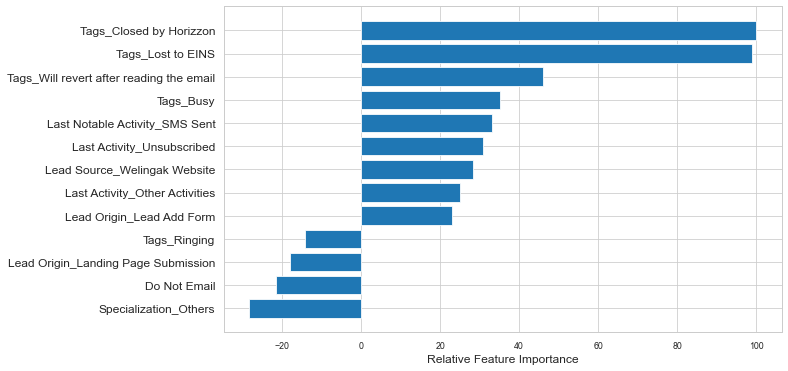

In [2108]:
# To plot features with their relative importance

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col1].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

## 11. Final Observations

The Final Evaluation Metrics for the train Dataset:
    
- Accuracy:     0.84%
- Sensitivity:  0.88%
- Specificity:  0.81%

The Final Evaluation Metrics for the test Dataset:
    
- Accuracy:     0.82%
- Sensitivity:  0.86%
- Specificity:  0.80%
    
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model


## 12. Recommendations

Following are the selected features which are more significant in predicting the conversion.

Features having positive impact on conversion probability:

Features with Positive Coefficient Values:    

- Tags_Closed by Horizzon
- Tags_Lost to EINS
- Tags_Will revert after reading the email
- Tags_Busy
- Last Activity_Unsubscribed
- Last Notable Activity_SMS Sent
- Lead Source_Welingak Website
- Last Activity_Other Activities
- Lead Origin_Lead Add Form

Features having negative impact on conversion probability:

Features with Negative Coefficient Values:
  
- Specialization_Others 
- Do Not Email
- Lead Origin_Landing Page Submission
- Tags_Ringing